## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\Users\laogoon\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
x_train, y_train = train
x_test, y_test = test
x_train = x_train / 255.
x_test = x_test / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Convert y to onehot
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """
    Try to build your own model
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
Compile your model
"""
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [7]:
"""
Set epochs
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 5s 93us/step - loss: 1.9186 - acc: 0.3074 - val_loss: 1.7648 - val_acc: 0.3642
Epoch 2/500
50000/50000 [==============================] - 2s 50us/step - loss: 1.7013 - acc: 0.3922 - val_loss: 1.6499 - val_acc: 0.4174
Epoch 3/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.6020 - acc: 0.4320 - val_loss: 1.6047 - val_acc: 0.4330
Epoch 4/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.5433 - acc: 0.4501 - val_loss: 1.5204 - val_acc: 0.4505
Epoch 5/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.4947 - acc: 0.4678 - val_loss: 1.4913 - val_acc: 0.4698
Epoch 6/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.4533 - acc: 0.4803 - val_loss: 1.4674 - val_acc: 0.4832
Epoch 7/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.4208 - acc: 0.4923 - val_loss: 1.4381 - 

50000/50000 [==============================] - 2s 47us/step - loss: 0.5398 - acc: 0.8081 - val_loss: 2.0392 - val_acc: 0.5005
Epoch 60/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.5067 - acc: 0.8194 - val_loss: 2.0319 - val_acc: 0.5113
Epoch 61/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.4970 - acc: 0.8224 - val_loss: 2.0565 - val_acc: 0.5099
Epoch 62/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.4973 - acc: 0.8203 - val_loss: 2.0923 - val_acc: 0.5103
Epoch 63/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.4800 - acc: 0.8282 - val_loss: 2.1326 - val_acc: 0.5060
Epoch 64/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.4704 - acc: 0.8328 - val_loss: 2.1886 - val_acc: 0.5077
Epoch 65/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.4670 - acc: 0.8332 - val_loss: 2.2537 - val_acc: 0.4950
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.2548 - acc: 0.9076 - val_loss: 3.4947 - val_acc: 0.4957
Epoch 119/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.2016 - acc: 0.9272 - val_loss: 3.5467 - val_acc: 0.4974
Epoch 120/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.2168 - acc: 0.9215 - val_loss: 3.5526 - val_acc: 0.4960
Epoch 121/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.2201 - acc: 0.9226 - val_loss: 3.4904 - val_acc: 0.4889
Epoch 122/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.2212 - acc: 0.9200 - val_loss: 3.5936 - val_acc: 0.4946
Epoch 123/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.2377 - acc: 0.9150 - val_loss: 3.6782 - val_acc: 0.4954
Epoch 124/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.1956 - acc: 0.9305 - val_loss: 3.6932 - val_acc: 0.4906
Epoch 125/500
50000/

50000/50000 [==============================] - 2s 46us/step - loss: 0.1480 - acc: 0.9488 - val_loss: 4.3291 - val_acc: 0.4881
Epoch 177/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.1962 - acc: 0.9310 - val_loss: 4.3131 - val_acc: 0.4812
Epoch 178/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.1802 - acc: 0.9381 - val_loss: 4.2322 - val_acc: 0.4980
Epoch 179/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.1350 - acc: 0.9524 - val_loss: 4.2981 - val_acc: 0.4965
Epoch 180/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.1651 - acc: 0.9414 - val_loss: 4.3526 - val_acc: 0.4842
Epoch 181/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.1389 - acc: 0.9503 - val_loss: 4.3461 - val_acc: 0.4891
Epoch 182/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.1619 - acc: 0.9422 - val_loss: 4.4017 - val_acc: 0.4903
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 2s 46us/step - loss: 0.1341 - acc: 0.9550 - val_loss: 4.7784 - val_acc: 0.4890
Epoch 235/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.2252 - acc: 0.9264 - val_loss: 4.5984 - val_acc: 0.4909
Epoch 236/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.1223 - acc: 0.9567 - val_loss: 4.5814 - val_acc: 0.4966
Epoch 237/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.1319 - acc: 0.9543 - val_loss: 4.6626 - val_acc: 0.4859
Epoch 238/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.1086 - acc: 0.9622 - val_loss: 4.7538 - val_acc: 0.4927
Epoch 239/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.0877 - acc: 0.9686 - val_loss: 4.6644 - val_acc: 0.4893
Epoch 240/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.0904 - acc: 0.9690 - val_loss: 4.6897 - val_acc: 0.4931
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 2s 46us/step - loss: 0.0627 - acc: 0.9783 - val_loss: 4.8472 - val_acc: 0.4923
Epoch 293/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.0979 - acc: 0.9663 - val_loss: 4.8699 - val_acc: 0.4920
Epoch 294/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.1447 - acc: 0.9521 - val_loss: 4.9480 - val_acc: 0.4898
Epoch 295/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.1016 - acc: 0.9667 - val_loss: 4.8844 - val_acc: 0.4907
Epoch 296/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.1244 - acc: 0.9580 - val_loss: 4.9110 - val_acc: 0.4934
Epoch 297/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.0899 - acc: 0.9697 - val_loss: 5.0154 - val_acc: 0.4887
Epoch 298/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.1305 - acc: 0.9566 - val_loss: 4.8690 - val_acc: 0.4891
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 2s 46us/step - loss: 0.0818 - acc: 0.9716 - val_loss: 5.0328 - val_acc: 0.4930
Epoch 351/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.0516 - acc: 0.9829 - val_loss: 5.0686 - val_acc: 0.4905
Epoch 352/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.0740 - acc: 0.9748 - val_loss: 5.1897 - val_acc: 0.4819
Epoch 353/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.1640 - acc: 0.9491 - val_loss: 5.0734 - val_acc: 0.4898
Epoch 354/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.1117 - acc: 0.9638 - val_loss: 5.0856 - val_acc: 0.4851
Epoch 355/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.0837 - acc: 0.9721 - val_loss: 5.0565 - val_acc: 0.4954
Epoch 356/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.0639 - acc: 0.9772 - val_loss: 5.0445 - val_acc: 0.4990
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 2s 46us/step - loss: 0.1198 - acc: 0.9605 - val_loss: 4.6918 - val_acc: 0.4849
Epoch 409/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.0475 - acc: 0.9837 - val_loss: 4.6811 - val_acc: 0.4956
Epoch 410/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.0255 - acc: 0.9929 - val_loss: 4.7691 - val_acc: 0.4917
Epoch 411/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.0272 - acc: 0.9926 - val_loss: 4.7831 - val_acc: 0.4972
Epoch 412/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.0121 - acc: 0.9980 - val_loss: 4.8076 - val_acc: 0.5016
Epoch 413/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.0061 - acc: 0.9995 - val_loss: 4.8407 - val_acc: 0.5006
Epoch 414/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.0047 - acc: 0.9996 - val_loss: 4.8815 - val_acc: 0.4990
Epoch 415/500
50000/50000 [=======

50000/50000 [==============================] - 2s 49us/step - loss: 0.0602 - acc: 0.9803 - val_loss: 4.7519 - val_acc: 0.4947
Epoch 467/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.0206 - acc: 0.9950 - val_loss: 4.7212 - val_acc: 0.4981
Epoch 468/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.0095 - acc: 0.9987 - val_loss: 4.8195 - val_acc: 0.4992
Epoch 469/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.0078 - acc: 0.9991 - val_loss: 4.8175 - val_acc: 0.5024
Epoch 470/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.0040 - acc: 0.9998 - val_loss: 4.8525 - val_acc: 0.5033
Epoch 471/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.0033 - acc: 0.9999 - val_loss: 4.8688 - val_acc: 0.5027
Epoch 472/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 4.9050 - val_acc: 0.5024
Epoch 473/500
50000/50000 [=======

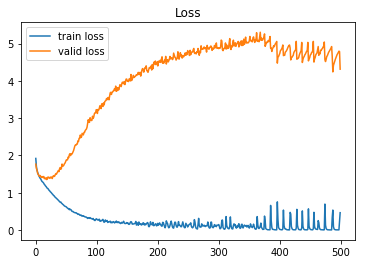

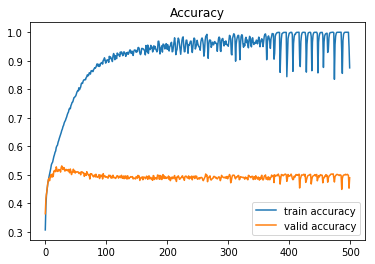

In [9]:
import matplotlib.pyplot as plt
"""
Get the training loss / validation loss / training accuracy / validation accuracy and plot them
"""

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [10]:
"""
Compile your model
"""
optimizer = keras.optimizers.SGD(lr=0.01)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [11]:
"""
Set epochs
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.0544 - acc: 0.9841 - val_loss: 4.2904 - val_acc: 0.4980
Epoch 2/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0250 - acc: 0.9955 - val_loss: 4.3424 - val_acc: 0.4981
Epoch 3/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.0190 - acc: 0.9979 - val_loss: 4.3703 - val_acc: 0.4980
Epoch 4/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0161 - acc: 0.9988 - val_loss: 4.4053 - val_acc: 0.4997
Epoch 5/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0143 - acc: 0.9993 - val_loss: 4.4252 - val_acc: 0.4994
Epoch 6/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.0130 - acc: 0.9995 - val_loss: 4.4445 - val_acc: 0.4992
Epoch 7/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.0119 - acc: 0.9996 - val_loss: 4.4668 - 

50000/50000 [==============================] - 2s 41us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 4.8801 - val_acc: 0.5034
Epoch 60/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 4.8838 - val_acc: 0.5031
Epoch 61/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 4.8886 - val_acc: 0.5034
Epoch 62/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 4.8921 - val_acc: 0.5034
Epoch 63/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 4.8963 - val_acc: 0.5038
Epoch 64/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 4.9008 - val_acc: 0.5031
Epoch 65/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 4.9037 - val_acc: 0.5034
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 2s 39us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 5.0564 - val_acc: 0.5045
Epoch 119/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 5.0589 - val_acc: 0.5038
Epoch 120/500
50000/50000 [==============================] - 2s 39us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 5.0607 - val_acc: 0.5051
Epoch 121/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 5.0644 - val_acc: 0.5042
Epoch 122/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 5.0657 - val_acc: 0.5041
Epoch 123/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 5.0691 - val_acc: 0.5040
Epoch 124/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 5.0698 - val_acc: 0.5044
Epoch 125/500
50000/

50000/50000 [==============================] - 2s 40us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 5.1626 - val_acc: 0.5049
Epoch 177/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 5.1640 - val_acc: 0.5050
Epoch 178/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 5.1656 - val_acc: 0.5050
Epoch 179/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 5.1675 - val_acc: 0.5053
Epoch 180/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 5.1686 - val_acc: 0.5053
Epoch 181/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 5.1707 - val_acc: 0.5052
Epoch 182/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 5.1718 - val_acc: 0.5052
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 2s 40us/step - loss: 9.2330e-04 - acc: 1.0000 - val_loss: 5.2384 - val_acc: 0.5044
Epoch 235/500
50000/50000 [==============================] - 2s 39us/step - loss: 9.1913e-04 - acc: 1.0000 - val_loss: 5.2395 - val_acc: 0.5044
Epoch 236/500
50000/50000 [==============================] - 2s 40us/step - loss: 9.1588e-04 - acc: 1.0000 - val_loss: 5.2400 - val_acc: 0.5046
Epoch 237/500
50000/50000 [==============================] - 2s 40us/step - loss: 9.1263e-04 - acc: 1.0000 - val_loss: 5.2418 - val_acc: 0.5045
Epoch 238/500
50000/50000 [==============================] - 2s 40us/step - loss: 9.0873e-04 - acc: 1.0000 - val_loss: 5.2432 - val_acc: 0.5047
Epoch 239/500
50000/50000 [==============================] - 2s 40us/step - loss: 9.0499e-04 - acc: 1.0000 - val_loss: 5.2436 - val_acc: 0.5043
Epoch 240/500
50000/50000 [==============================] - 2s 40us/step - loss: 9.0191e-04 - acc: 1.0000 - val_loss: 5.2450 - val_acc: 0.5045
Epoch 

Epoch 291/500
50000/50000 [==============================] - 2s 41us/step - loss: 7.5343e-04 - acc: 1.0000 - val_loss: 5.2948 - val_acc: 0.5048
Epoch 292/500
50000/50000 [==============================] - 2s 42us/step - loss: 7.5099e-04 - acc: 1.0000 - val_loss: 5.2958 - val_acc: 0.5049
Epoch 293/500
50000/50000 [==============================] - 2s 41us/step - loss: 7.4842e-04 - acc: 1.0000 - val_loss: 5.2967 - val_acc: 0.5044
Epoch 294/500
50000/50000 [==============================] - 2s 40us/step - loss: 7.4616e-04 - acc: 1.0000 - val_loss: 5.2977 - val_acc: 0.5045
Epoch 295/500
50000/50000 [==============================] - 2s 40us/step - loss: 7.4329e-04 - acc: 1.0000 - val_loss: 5.2980 - val_acc: 0.5048
Epoch 296/500
50000/50000 [==============================] - 2s 39us/step - loss: 7.4115e-04 - acc: 1.0000 - val_loss: 5.2997 - val_acc: 0.5043
Epoch 297/500
50000/50000 [==============================] - 2s 40us/step - loss: 7.3882e-04 - acc: 1.0000 - val_loss: 5.3004 - val_acc:

Epoch 348/500
50000/50000 [==============================] - 2s 40us/step - loss: 6.3588e-04 - acc: 1.0000 - val_loss: 5.3406 - val_acc: 0.5038
Epoch 349/500
50000/50000 [==============================] - 2s 42us/step - loss: 6.3423e-04 - acc: 1.0000 - val_loss: 5.3416 - val_acc: 0.5038
Epoch 350/500
50000/50000 [==============================] - 2s 45us/step - loss: 6.3233e-04 - acc: 1.0000 - val_loss: 5.3428 - val_acc: 0.5042
Epoch 351/500
50000/50000 [==============================] - 2s 43us/step - loss: 6.3074e-04 - acc: 1.0000 - val_loss: 5.3434 - val_acc: 0.5041
Epoch 352/500
50000/50000 [==============================] - 2s 42us/step - loss: 6.2889e-04 - acc: 1.0000 - val_loss: 5.3443 - val_acc: 0.5043
Epoch 353/500
50000/50000 [==============================] - 2s 40us/step - loss: 6.2737e-04 - acc: 1.0000 - val_loss: 5.3451 - val_acc: 0.5043
Epoch 354/500
50000/50000 [==============================] - 2s 40us/step - loss: 6.2554e-04 - acc: 1.0000 - val_loss: 5.3459 - val_acc:

Epoch 405/500
50000/50000 [==============================] - 2s 40us/step - loss: 5.4980e-04 - acc: 1.0000 - val_loss: 5.3802 - val_acc: 0.5040
Epoch 406/500
50000/50000 [==============================] - 2s 40us/step - loss: 5.4847e-04 - acc: 1.0000 - val_loss: 5.3813 - val_acc: 0.5044
Epoch 407/500
50000/50000 [==============================] - 2s 40us/step - loss: 5.4730e-04 - acc: 1.0000 - val_loss: 5.3816 - val_acc: 0.5041
Epoch 408/500
50000/50000 [==============================] - 2s 41us/step - loss: 5.4569e-04 - acc: 1.0000 - val_loss: 5.3819 - val_acc: 0.5039
Epoch 409/500
50000/50000 [==============================] - 2s 50us/step - loss: 5.4461e-04 - acc: 1.0000 - val_loss: 5.3824 - val_acc: 0.5039
Epoch 410/500
50000/50000 [==============================] - 4s 72us/step - loss: 5.4335e-04 - acc: 1.0000 - val_loss: 5.3830 - val_acc: 0.5041
Epoch 411/500
50000/50000 [==============================] - 3s 56us/step - loss: 5.4207e-04 - acc: 1.0000 - val_loss: 5.3839 - val_acc:

Epoch 462/500
50000/50000 [==============================] - 2s 40us/step - loss: 4.8399e-04 - acc: 1.0000 - val_loss: 5.4133 - val_acc: 0.5043
Epoch 463/500
50000/50000 [==============================] - 2s 40us/step - loss: 4.8310e-04 - acc: 1.0000 - val_loss: 5.4140 - val_acc: 0.5042
Epoch 464/500
50000/50000 [==============================] - 2s 40us/step - loss: 4.8204e-04 - acc: 1.0000 - val_loss: 5.4145 - val_acc: 0.5044
Epoch 465/500
50000/50000 [==============================] - 2s 39us/step - loss: 4.8098e-04 - acc: 1.0000 - val_loss: 5.4149 - val_acc: 0.5047
Epoch 466/500
50000/50000 [==============================] - 2s 40us/step - loss: 4.7999e-04 - acc: 1.0000 - val_loss: 5.4155 - val_acc: 0.5045
Epoch 467/500
50000/50000 [==============================] - 2s 42us/step - loss: 4.7898e-04 - acc: 1.0000 - val_loss: 5.4160 - val_acc: 0.5045
Epoch 468/500
50000/50000 [==============================] - 2s 44us/step - loss: 4.7796e-04 - acc: 1.0000 - val_loss: 5.4167 - val_acc:

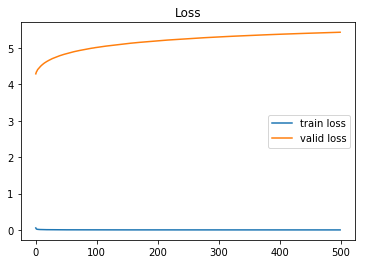

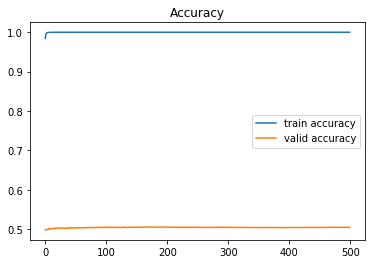

In [12]:
import matplotlib.pyplot as plt
"""
Get the training loss / validation loss / training accuracy / validation accuracy and plot them
"""

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()